In [4]:
#데이터 준비

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


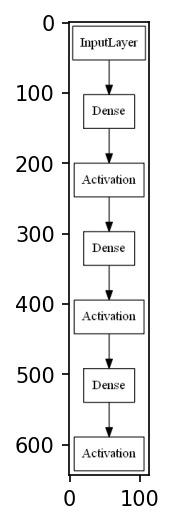

In [14]:
#모델 생성
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
import tensorflow

import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

#인스턴스 만들기
model = Sequential()

#입력 유닛 수는 784개, 첫 번째 전결합층의 출력 유닛 수는 256
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

#두 번째 전결합층의 출력 유닛 수는 10
model.add(Dense(10))
model.add(Activation("relu"))

#세 번째 전결합층(출력층)의 출력 유닛 수는 10개
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy")
metics = ["accuracy"]

#모델 구조 출력하기
tensorflow.keras.utils.plot_model(model, "model125.png", show_layer_names=False)

#모델 구조 시각화하기
image = plt.imread("model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show() 

Epoch 1/3
188/188 [==============================] - 2s 4ms/step - loss: 2.2171 - acc: 0.2799
Epoch 2/3
188/188 [==============================] - 1s 3ms/step - loss: 1.7668 - acc: 0.6742
Epoch 3/3
188/188 [==============================] - 1s 3ms/step - loss: 1.4224 - acc: 0.7604


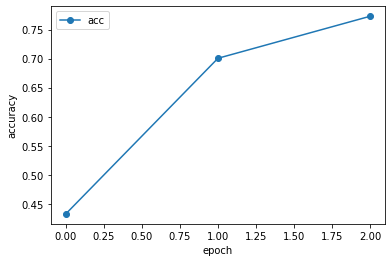

In [17]:
#모델 학습
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["acc"])

history = model.fit(X_train, y_train, verbose=1, epochs=3)

#acc와 val_acc 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

In [1]:
#모델 평가
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["acc"])

model.fit(X_train, y_train)

score = model.evaluate(X_test, y_test, verbose=1)

print("evaluate loss: {0[0]} \nevaluate acc: {0[1]}".format(score))

Using TensorFlow backend.


32/32 [==============================] - 1s 3ms/step - loss: 1.9236 - acc: 0.6120
evaluate loss: 1.923612117767334 
evaluate acc: 0.6119999885559082


188/188 [==============================] - 2s 3ms/step - loss: 2.2108 - accuracy: 0.2535
evaluate loss: 1.8955419063568115 
evaluate acc: 0.5320000052452087


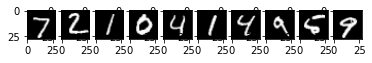

[7 6 1 0 4 1 9 4 0 7]


In [15]:
#모델에 의한 분류
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]} \nevaluate acc: {0[1]}".format(score))

#테스트 데이터의 첫 10장 표시
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), "gray")
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)